# Quant/Algo Trading on Bitcoin - Analysis and Backtesting

# Notebook 01 - Data Preparation

**By: [Jonathan Yeung](https://github.com/jonathan-yeung)**

In this notebook, I intend to get and check the dataset of Bitcoin for further analysis and backtesting. I also visualize the daily price chart below.

---

# About The Project

In this project, I intend to find insights about the Bitcoin market and backtest strategies to see whether they are effective.

Some main types of strategies will be tested:
- Mean Reversion
- Trend Following

New ideas might be added to the project in the future.

# About The Dataset

It is extracted from Yahoo Finance, which is originally from CoinMarketCap.

---

# Imports

In [17]:
# data fetching
import yfinance as yf

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio

# misc
import os

# Getting The Data

We fetch the data from Yahoo Finance, which is orginally from CoinMarketCap.

In [18]:
btc = yf.Ticker("BTC-USD")
raw = btc.history(period="max")[["Open", "High", "Low", "Close", "Volume"]]

In [19]:
raw.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100


In [20]:
file_path = "/Users/jonwfyeung/Downloads/trading_strategies/"

In [21]:
# raw.to_csv(file_path + "data/raw.csv")

In [22]:
check_file = os.path.isfile(file_path + "data/raw.csv")

check_file

True

# Sanity Check On Data

In [23]:
df = pd.read_csv(file_path + "data/raw.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3472 non-null   object 
 1   Open    3472 non-null   float64
 2   High    3472 non-null   float64
 3   Low     3472 non-null   float64
 4   Close   3472 non-null   float64
 5   Volume  3472 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 162.9+ KB


The "Date" column is of object type now. We convert the dates into datetime format and make them as the indexes for the sake of convenience afterwards.

In [25]:
df["Date"] = pd.to_datetime(df["Date"], utc=True)
df.set_index("Date", inplace=True)
df.index = df.index.strftime("%Y-%m-%d")

In [26]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3472 entries, 2014-09-17 to 2024-03-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3472 non-null   float64
 1   High    3472 non-null   float64
 2   Low     3472 non-null   float64
 3   Close   3472 non-null   float64
 4   Volume  3472 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 162.8+ KB


In [28]:
df.shape

(3472, 5)

In [29]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [30]:
# check missing date
first_day = df.index.min()
last_day = df.index.max()

full_range = pd.date_range(start=first_day, end=last_day, freq="D")

full_range.difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

## Summary

- The dataset contains BTC-USD daily prices and volumes on 3472 days
- Date range: 2014-09-17 to 2024-03-19
- No missing value in any column
- No missing date in the data

Data types:
- Indexes: "Date" in datetime format
- "Open", "High", "Low", "Close": floats
- "Volume": integers

We can have an overview of the price chart (OHLC Candlesticks) generated from the dataset.

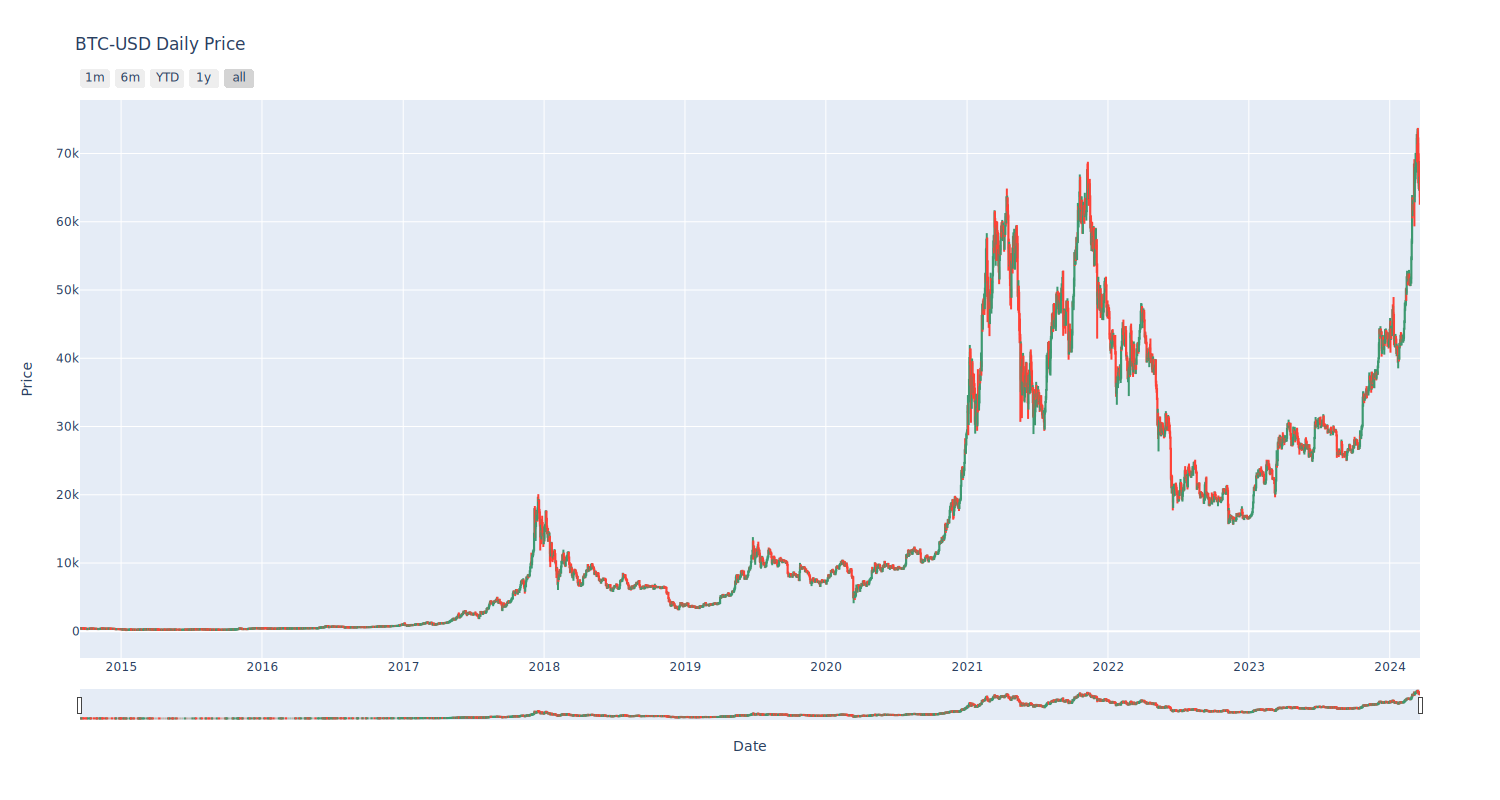

In [31]:
fig = go.Figure()
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close']))

fig.update_layout(yaxis_title="Price",
                  xaxis_title="Date",
                  title="BTC-USD Daily Price",
                  hovermode="x unified",
                  width=1500,
                  height=800)

# range slider and selector
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.update_xaxes(rangeslider_thickness = 0.05)
fig.show(renderer="svg")